In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

from feature_engine.transformation import BoxCoxTransformer

data = fetch_openml(name='house_prices', as_frame=True)
data = data.frame

X = data.drop(['SalePrice', 'Id'], axis=1)
y = data['SalePrice']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

(X_train.head())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1066,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
638,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal
799,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal
380,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal


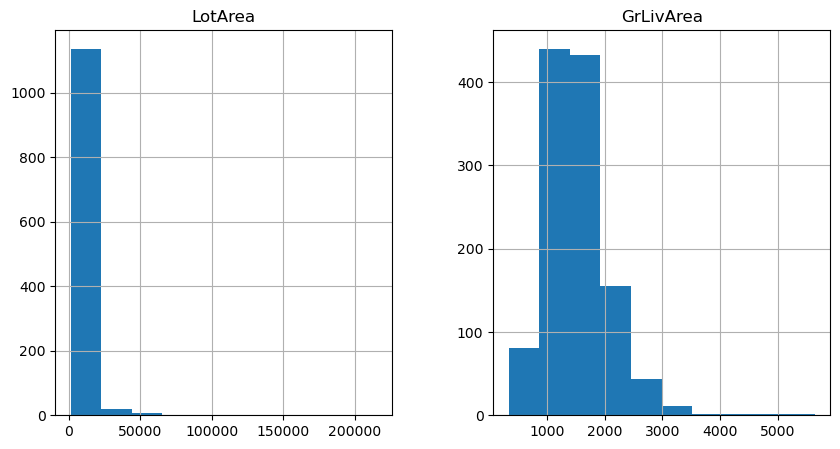

In [4]:
X_train[['LotArea','GrLivArea']].hist(figsize=(10,5))
plt.show()

In [5]:
boxcox = BoxCoxTransformer(variables=['LotArea','GrLivArea'])
train_t = boxcox.fit_transform(X_train)

In [6]:
boxcox.lambda_dict_

{'LotArea': 0.0028222323212918547, 'GrLivArea': -0.006312580181375803}

In [7]:
test_t = boxcox.transform(X_test)

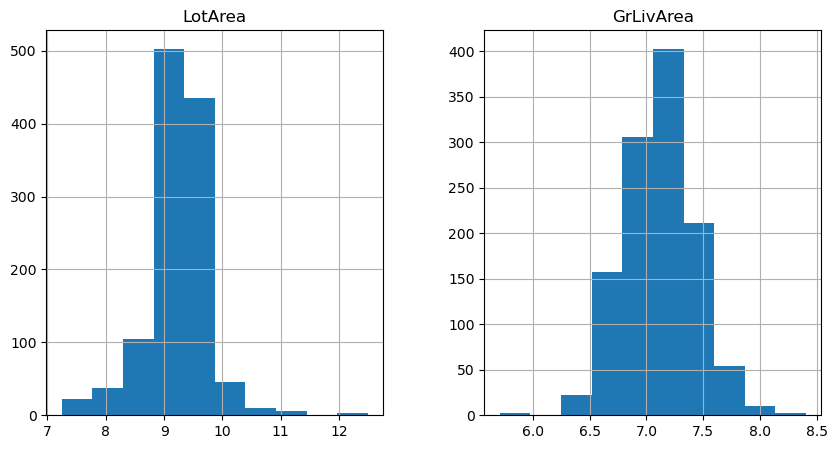

In [8]:
train_t[['LotArea','GrLivArea']].hist(figsize=(10,5))
plt.show()

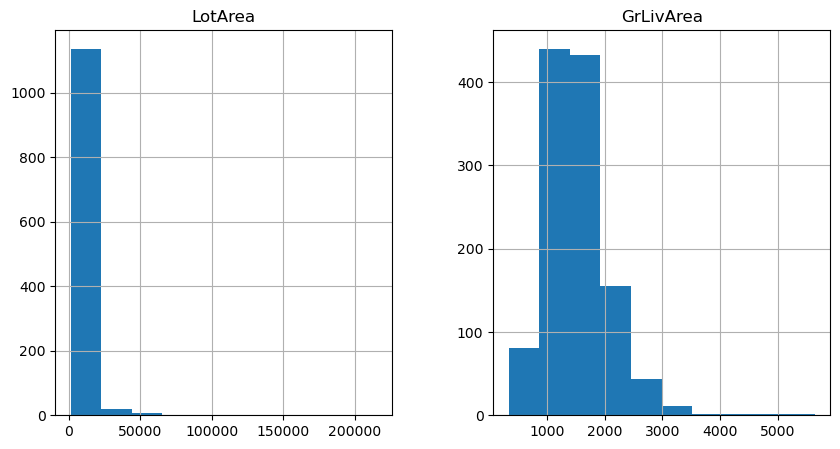

In [9]:
train_u = boxcox.inverse_transform(train_t)
train_u[['LotArea','GrLivArea']].hist(figsize=(10,5))
plt.show()

In [10]:
from feature_engine.transformation import YeoJohnsonTransformer
yeojohnson = BoxCoxTransformer(variables=['LotArea','GrLivArea'])
train_yj = yeojohnson.fit_transform(X_train)

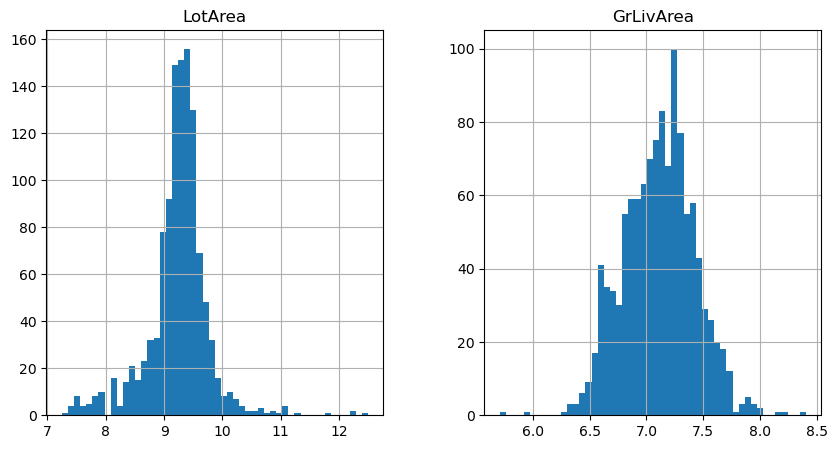

In [13]:
train_yj[['LotArea','GrLivArea']].hist(bins=50,figsize=(10,5))
plt.show()